In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [18]:
path = '/mnt/HC_Volume_18315164/home-jupyter/jupyter-i-sedelkin/practice/data/7_miniproject/step_{}_lesson_7.csv'
visits = pd.read_csv(path.format(1))
visits

,date,user_type,visits
0,2020-06-15,People,417.0
1,2020-06-15,Robots,177.0
2,2020-06-16,People,472.0
3,2020-06-16,Robots,91.0
4,2020-06-17,People,475.0
5,2020-06-17,Robots,138.0


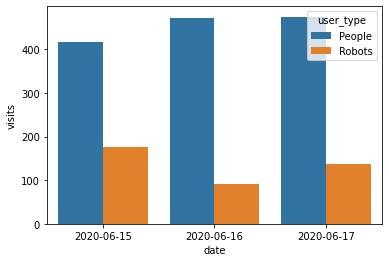

In [11]:
sns.barplot(x='date', y='visits', data=visits, hue='user_type')
# sns.barplot(x='date', y='visits', data=visits[visits.user_type == 'Robots'])

In [19]:
browsers = pd.read_csv(path.format(2))
browsers

,date,browser,visits
0,2020-06-15,Google Chrome,354.0
1,2020-06-15,Firefox,58.0
2,2020-06-15,Yandex Browser,54.0
3,2020-06-15,Safari,41.0
4,2020-06-15,Chrome Mobile,31.0
5,2020-06-15,Opera,16.0
6,2020-06-15,Mobile Safari,16.0
7,2020-06-15,Samsung Internet,9.0
8,2020-06-15,Edge,5.0
9,2020-06-15,UCWEB,4.0


In [17]:
(browsers[browsers.browser == 'Google Chrome'].visits.sum() / browsers.visits.sum() * 100).round(0)

60.0

In [21]:
robots = pd.read_csv(path.format(3))
robots.head()

,date,browser,user_type,visits
0,2020-06-15,Google Chrome,People,250.0
1,2020-06-15,Google Chrome,Robots,104.0
2,2020-06-15,Yandex Browser,People,47.0
3,2020-06-15,Firefox,Robots,31.0
4,2020-06-15,Chrome Mobile,People,31.0


In [80]:
(robots[robots.user_type == 'Robots'] \
    .groupby('browser') \
    .agg({'visits': 'sum'}) \

    / robots.groupby('browser') \
    .agg({'visits': 'sum'})) \
    .sort_values(by='visits', ascending=False)

,visits
browser,
UCWEB,1.000000
Safari,0.536585
Firefox,0.534483
Chromium,0.500000
Opera,0.312500
Google Chrome,0.293785
Edge,0.200000
Yandex Browser,0.129630
Samsung Internet,0.111111


In [81]:
users = pd.read_csv(path.format(4))
users.head()

,date,browser,user_type,visits
0,2020-06-15,Google Chrome,People,250.0
1,2020-06-15,Google Chrome,Robots,104.0
2,2020-06-15,Yandex Browser,People,47.0
3,2020-06-15,Firefox,Robots,31.0
4,2020-06-15,Chrome Mobile,People,31.0


In [82]:
users['share'] = (users.visits / users.visits.sum() * 100).round(1)
users.query('browser == "Safari" & user_type == "People"')

,date,browser,user_type,visits,share
7,2020-06-15,Safari,People,19.0,3.2


In [64]:
# Google Sheets API

import pandas as pd
import gspread
from df2gspread import df2gspread as d2g
from oauth2client.service_account import ServiceAccountCredentials

# Specify path to your file with credentials
path_to_credential = '/mnt/HC_Volume_18315164/home-jupyter/jupyter-i-sedelkin/practice/API/analytics-test-401314-c7d013ee2e26.json' 

# Specify name of table in google sheets
table_name = 'analytics_practice'

scope = ['https://spreadsheets.google.com/feeds',
         'https://www.googleapis.com/auth/drive']

credentials = ServiceAccountCredentials.from_json_keyfile_name(path_to_credential, scope)

gs = gspread.authorize(credentials)
work_sheet = gs.open(table_name)

# Select 1st sheet
sheet1 = work_sheet.sheet1

# Get data in python lists format
data = sheet1.get_all_values()

# Get header from data
headers = data.pop(0)

# Create df
df = pd.DataFrame(data, columns=headers)
df.head()

,sample,data


In [67]:
# Upload df to a Google sheet. If addressing by name fails, use sheet ID

sheet_name = 'metrika_users'
d2g.upload(users, '1Tap5e4MT135YDF-r-JBHgK_HVNnacmO4I60WKRBgluo', sheet_name, credentials=credentials, row_names=True)

<Worksheet 'metrika_users' id:575790694>

In [66]:
work_sheet.id

'1Tap5e4MT135YDF-r-JBHgK_HVNnacmO4I60WKRBgluo'

In [68]:
spreadsheet_url = "https://docs.google.com/spreadsheets/d/%s" % work_sheet.id

In [69]:
# Send the sheet link to yourself in a messenger

import requests
import json
from urllib.parse import urlencode


token = '6246203005:AAFNak4rfr_sZnR9KcuKC07JCudRY-65LEY'
chat_id = 57223  # your chat id

message = spreadsheet_url  # text which you want to send

params = {'chat_id': chat_id, 'text': message}

base_url = f'https://api.telegram.org/bot{token}/'
url = base_url + 'sendMessage?' + urlencode(params)
# Only if you need it
# proxy = {'https': 'https://77.48.23.199:57842'}

# To send request via proxy
# resp = requests.get(url, proxies=proxy)
resp = requests.get(url)

In [83]:
from io import BytesIO
import requests
r = requests.get('https://docs.google.com/spreadsheets/d/e/2PACX-1vQWMsvBTVio9C7IOOxfFO9C15BRHyME-_ENHqBodDOjuiHwk9fCuF5hUVmDs497PZOqPYK3exdSikOK/pub?gid=1006633900&single=true&output=csv')
data = r.content

more_users = pd.read_csv(BytesIO(data))

In [87]:
more_users

,date,browser,user_type,users
0,2020-06-15,Google Chrome,People,240.0
1,2020-06-15,Google Chrome,Robots,104.0
2,2020-06-15,Yandex Browser,People,44.0
3,2020-06-15,Chrome Mobile,People,30.0
4,2020-06-15,Firefox,Robots,29.0
5,2020-06-15,Firefox,People,26.0
6,2020-06-15,Safari,Robots,20.0
7,2020-06-15,Safari,People,17.0
8,2020-06-15,Mobile Safari,People,14.0
9,2020-06-15,Opera,People,10.0


In [86]:
users

,date,browser,user_type,visits,share
0,2020-06-15,Google Chrome,People,250.0,42.1
1,2020-06-15,Google Chrome,Robots,104.0,17.5
2,2020-06-15,Yandex Browser,People,47.0,7.9
3,2020-06-15,Firefox,Robots,31.0,5.2
4,2020-06-15,Chrome Mobile,People,31.0,5.2
5,2020-06-15,Firefox,People,27.0,4.5
6,2020-06-15,Safari,Robots,22.0,3.7
7,2020-06-15,Safari,People,19.0,3.2
8,2020-06-15,Mobile Safari,People,15.0,2.5
9,2020-06-15,Opera,People,11.0,1.9


In [89]:
user_data = users.merge(more_users)

In [93]:
user_data['visits_by_users'] = (user_data.visits / user_data.users).round(0)

In [94]:
user_data

,date,browser,user_type,visits,share,users,visits_by_users
0,2020-06-15,Google Chrome,People,250.0,42.1,240.0,1.0
1,2020-06-15,Google Chrome,Robots,104.0,17.5,104.0,1.0
2,2020-06-15,Yandex Browser,People,47.0,7.9,44.0,1.0
3,2020-06-15,Firefox,Robots,31.0,5.2,29.0,1.0
4,2020-06-15,Chrome Mobile,People,31.0,5.2,30.0,1.0
5,2020-06-15,Firefox,People,27.0,4.5,26.0,1.0
6,2020-06-15,Safari,Robots,22.0,3.7,20.0,1.0
7,2020-06-15,Safari,People,19.0,3.2,17.0,1.0
8,2020-06-15,Mobile Safari,People,15.0,2.5,14.0,1.0
9,2020-06-15,Opera,People,11.0,1.9,10.0,1.0
